# Gaussian distributions: how to recognize them, and where they come from

### Goals:

1. To understand the basic properties of a Gaussian distribution (a.k.a. "Normal Distribution", a.k.a. "Bell Curve").
2. To understand the parameters of the Gaussian distribution.
3. To get an intuitive sense of why Gaussian distributions are so common in science, and what sorts of process might give rise to Gaussian distributions.
4. To understand how and why Gaussian distributions are used to express statistical significance, and how to convert between Gaussian "sigma" and p-value.

### Timing

1. Try to finish this notebook in 35 minutes.

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1VJKgUXC5ML6bvhed6-O0GOhF74H98IM27VAAfdvef68/edit?usp=drive_link

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

plt.rcParams['font.size'] = 14

### New/important functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.poisson           | generates a random integer from a "Poisson" distribution |
|    scipy.stats.norm      | Interact with a Gaussian distribution |
|    plt.annotate          | Add text to a plot |  


# Gaussian distribution, aka Normal Distribution, aka Bell Curve

A Gaussian distribution is a distribution defined by:

$G(x | \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

Where the notation $G(x | \mu, \sigma)$ means that:

The function $G$ depends on $x$, $\mu$ and $\sigma$, but typically we provide $\mu$ and $\sigma$ to define a specific curve as a function of $x$.

$x$ is what we sometimes call the "independent variable", while $\mu$ and $\sigma$ are sometimes called "parameters".  Basically, each set of values of $\mu$ and $\sigma$ defines a different curve.


If we take $\mu = 0$ and $\sigma = 1$ then the formula simplifies somewhat:

$G(x | \mu=0, \sigma=1) = \frac{1}{1\sqrt{2\pi}}e^{-\frac{(x - 0)^2}{2*1^2}} = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

This is referred to as the "standard normal distribution" or "unit-Gaussian" (more on this later). 

Let's write a function to compute a Gaussian:

In [2]:
def gaussian(x, mu=0., sigma=1.):
    prefactor = 1 / ( sigma * np.sqrt(2*np.pi) )
    exponent = -(x - mu)**2 / (2*sigma**2)
    return prefactor * np.exp(exponent)

Let's plot that.  We are going to use the equation I wrote out above, and also the 'scipy.stats.norm' function to do it and then compare the two.

In [3]:
## Generate an array of values to plot/check
x_vals = np.linspace(-6, 6, 601)

## Compute the values of the Gaussian function with a mean of 0
## and a standard deviation of 1, using the values of x from
## the above array
y_vals_check = gaussian(x_vals, mu=0, sigma=1)

## Do the same thing, but using the scipy.stats.norm functionn 
## Note that the arguments have different names, and the 
## function is called in a slightly different manner i.e., you 
## specify the parameters in the call to norm() and then the 
## independent variable in the call to pdf()
y_vals = stats.norm(loc=0, scale=1).pdf(x_vals)

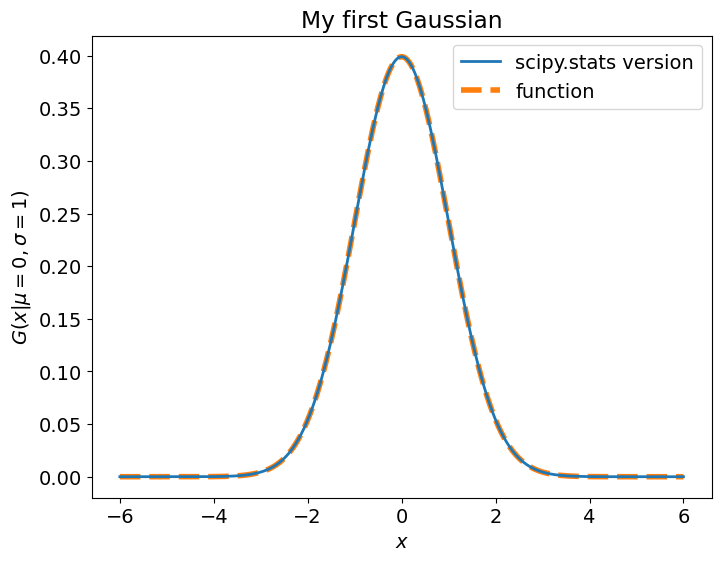

In [4]:
## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

## Plot the two sets of values, making one a thicker dashed
## line so that we can see both at the same time. To ensure the
## plotting order is correct (thin solid line on top of thick
## dashed line), we will use the 'zorder' argument)
plt.plot(x_vals, y_vals, lw=2, label="scipy.stats version", zorder=5)
plt.plot(x_vals, y_vals_check, lw=4, ls='--', label="function", zorder=4)
plt.legend()
plt.title("My first Gaussian")
plt.xlabel(r'$x$')
plt.ylabel(r'$G(x | \mu=0, \sigma=1)$')
plt.show()

### Properties of a Gaussian

Some properties we can infer just by examining the formula:

1. Since $\frac{(x-\mu)^2}{2\sigma^2}$ is always postive, and there is a minus sign in front of it, the term in the exponent is always zero or negative.  That means the maximum is when that term is zero, i.e., when $x = \mu$. Thus, $\mu$ gives the location of the peak of the distribution.  
2. Since the term in the exponent, $\frac{(x - \mu)^2}{2\sigma^2}$, is symmetric about $\mu$, the Gaussian distribution is symmetric about $\mu$, i.e., $G(x = \mu + a | \mu, \sigma) = G(x = \mu - a | \mu, \sigma)$
3. The distribution is always positive, i.e., $e^{-x} > 0$ for all x.
4. The distribution goes towards zero pretty quickly where $(x - \mu)^2$ is bigger than $\sigma$.  

And we can confirm those by looking at the plot. 

One thing to note:  the peak of the distribution is at $\frac{1}{\sqrt{2\pi}} \sim 0.4$.  This is to ensure that the integral of the distribution is 1, i.e.,

$\int_{-\infty}^{\infty} G(x | \mu, \sigma) = 1$


### What happens when we change the parameters?

First, lets plot a series of Gaussians with different values of $\mu$.

Then we will plot a series of Gaussians with different values of $\sigma$.

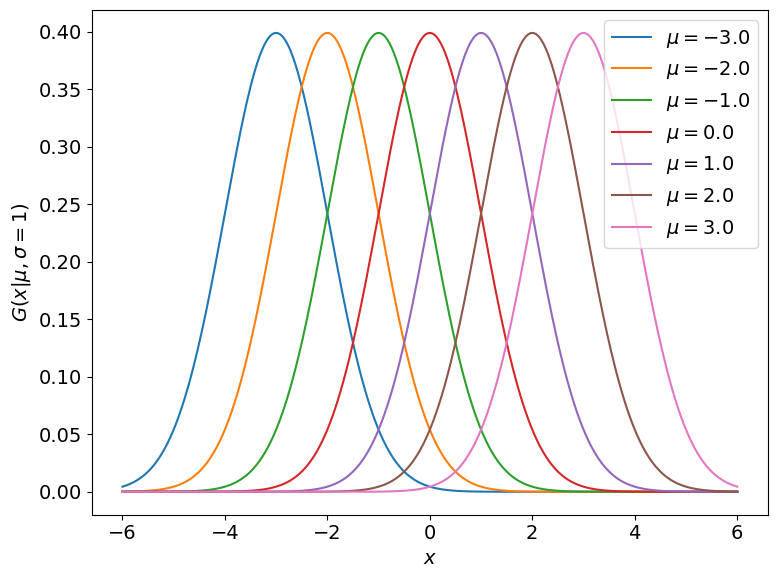

In [5]:
## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

## Loop over some values of the mean and plot the associated
## Gaussian functions. Note that we are using the same value of
## the standard deviation for all of the functions so that we
## assess how the mean affects the shape of the Gaussian
for mu in np.linspace(-3, 3, 7):
    ax.plot(x_vals, gaussian(x_vals, mu=mu), label=rf"$\mu = {mu:0.1f}$")

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$G(x | \mu, \sigma=1)$')

ax.legend()
fig.tight_layout()

plt.show()

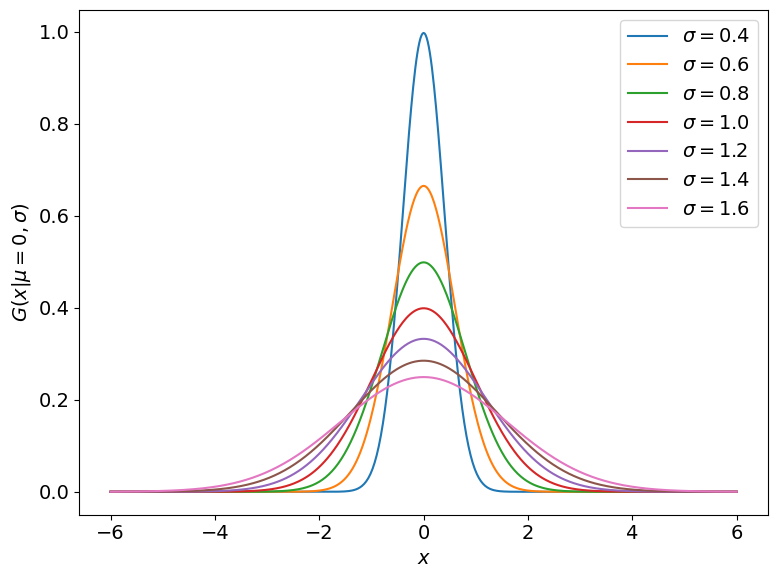

In [6]:
## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

## Loop over some values of the standard deviation and plot.
## Note that we are using the same value of the mean
for sigma in np.linspace(0.4, 1.6, 7):
    ax.plot(x_vals, gaussian(x_vals, sigma=sigma), label=rf"$\sigma = {sigma:0.1f}$")

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$G(x | \mu=0, \sigma)$')

ax.legend()
fig.tight_layout()

plt.show()

### Questions for discussion

#### 1.1 Why do all the Gaussians in the first example have the same height, while the ones in the second example do not?  Answer both in terms of the formula, and in plain english. 

### A comment on nomenclature / jargon:

We can always shift and rescale a Gaussian by setting $x' = \frac{x - \mu}{\sigma}$ so that the quantity in the exponent becomes 

$e^{-(\frac{x'}{2})^2}$

In practical terms, this means that if we have some quantity that we think is described by a Gaussian, we can subtract off the mean and divide by the standard deviation and it will now be described by a so-called "unit-Gaussian" i.e., a Gaussian with $\mu =0$ and $\sigma = 1$.

Because of this fact, there is a pretty standard jargon to refer to the x-axis of a Gaussian as though it had units of $\sigma$.  I.e., we say things like "a $3 \sigma$ outlier" all the time.  This would mean that, for that data point, $x - \mu = 3 \sigma$.


# Why a Gaussian?

We are learning about Gaussians because they occur all the time in nature. 

In short, a Gaussian distribution is what you get when a lot of random effects add up together, no matter what process causes these random effects, or, in statistical terms, no matter what probability distribution the individual samples are drawn from. This means that even if the individual samples don't follow a Gaussian distribution, the sum of those samples will tend to look more and more like a Gaussian distribution as the sample size gets larger. This is known as the central limit theorem. The central limit theorem is important because it allows us to make statistical inferences about a population based on a sample of data, even if we don't know much about the underlying population's distribution.

We are going to illustrate this with 2 different examples, where the individual samples are generated with a uniform and a Poisson distribution, respectively, and show that we get very Gaussian-looking distributions.

1.  We are going to generate 10000 sets of 12 random numbers from a uniform distribution between 0 and 1, i.e., there's no preference for certain numbers between 0 and 1, and add each set together. This will give us 10000 numbers between 0 and 12, and we will see that their distribution looks a lot like a Gaussian with $\mu = 6$ and $\sigma = 1$. 

2.  We are going to generate 10000 trials of an experiment, where on average, we expect to see 100 "events" in each trial. "Events" could be pretty much anything that you can count: nuclear decays, detections of distant supernovae, cars passing through an intersection, etc. The number of events in each individual trial therefore follows the Poisson distribution. This will give us 10000 numbers that are distributed very close to a Gaussian with $\mu = 100$ and $\sigma = 10$.

#### A Gaussian as the sum of 12 uniformly distributed numbers between 0 and 1

In [7]:
## '42' is a arbitrary seed for the quasi-random number generator 
## that numpy uses under the hood. This is a good practice to 
## ensure that the results are reproducible, because you will 
## get the same "random" numbers each time you run the code.
## Random number generators are super interesting and worth 
## reading about if you're curious. They are not truly random, 
## but pull values from a deterministic sequence that is 
## incredibly long and complex and simulates randomness.
rng = np.random.default_rng(42)

In [8]:
## This line tells numpy to generate 120000 random numbers 
## uniformly distributed betweeen 0 and 1, and split into 
## 10000 groups of 12. The rng.uniform() function can also take 
## upper and lower limits as arguments.
randomNumbers = rng.uniform(size=(10000, 12))

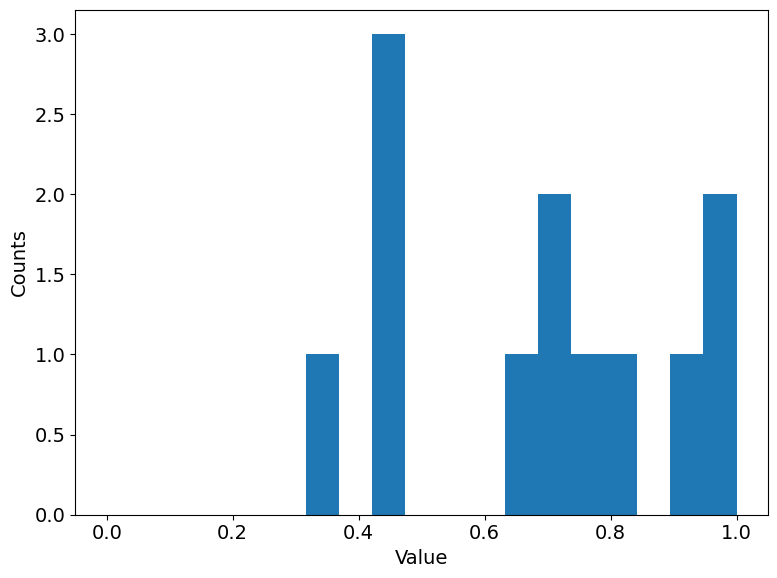

In [9]:
## Inspect the distribution of one set (change this number
## to look at any of the other sets!)
set_index = 1337

## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.hist(randomNumbers[set_index],bins=np.linspace(0,1,20))
ax.set_xlabel(r'Value')
ax.set_ylabel(r'Counts')

fig.tight_layout()

plt.show()

In [24]:
## This line takes the sum of each group of 12, giving us a total 
## of 10000 numbers. The "axis=1" argument tells numpy to sum 
## along the second axis of the array, which is the axis that 
## corresponds to the 12 numbers in each group.
sums = np.sum(randomNumbers, axis=1)

print("Some numbers are ", sums)
print(f"And we have {sums.size} numbers total")

Some numbers are  [7.26186673 7.19141012 5.38846954 ... 4.23288637 6.41376452 6.27971545]
And we have 10000 numbers total


##### Once you read this block of code and execute it, make sure to read the text immediately after!

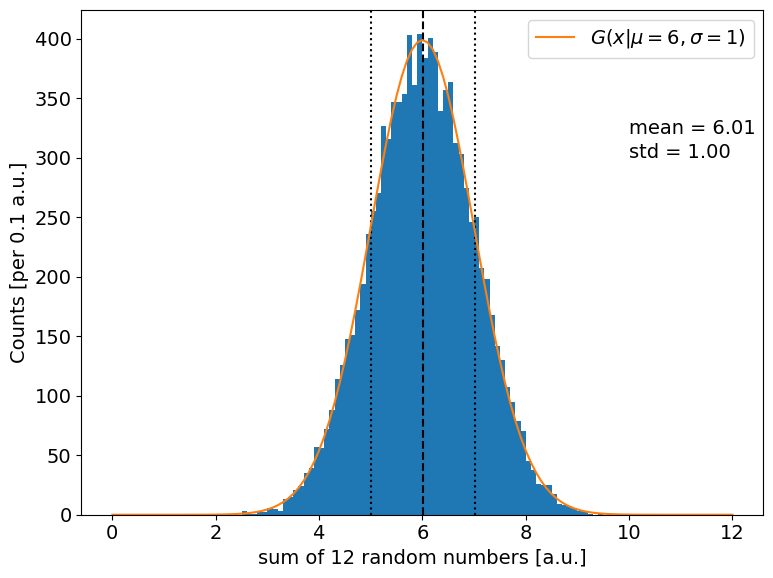

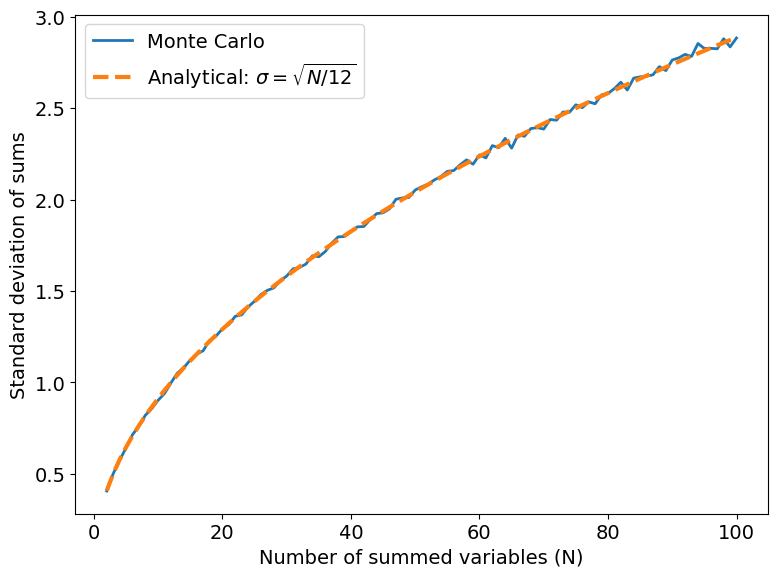

In [25]:
## Generate an array of possible sum values, ranging from 0
## to 12 which represent the possible sums of 12 numbers
## uniformly distributed between 0 and 1
xvals = np.linspace(0,12,121)

## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

## Plot a histogram of our sums
ax.hist(sums, bins=xvals)

## Plot some vertical lines for the mean and +-1 std. dev.
ax.axvline(x=np.mean(sums), ls='--', c='k')
ax.axvline(x=np.mean(sums)+np.std(sums), ls=':', c='k')
ax.axvline(x=np.mean(sums)-np.std(sums), ls=':', c='k')

## With an appropriate prefactor, compute the Gaussian
## that we would expect to match our histogram
prefactor = 10000 * 0.1
myGauss = prefactor*stats.norm(loc=6, scale=1).pdf(xvals)
ax.plot(xvals, myGauss, label=r'$G(x | \mu=6, \sigma=1)$')

ax.set_xlabel(r'sum of 12 random numbers [a.u.]')
ax.set_ylabel(r'Counts [per 0.1 a.u.]')

ax.legend()

ax.annotate(f"mean = {np.mean(sums):0.2f}", (10, 320))
ax.annotate(f"std = {np.std(sums):0.2f}", (10, 300))

fig.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# Number of summed variables
N_vals = np.arange(2, 101)

# Monte Carlo trials per N
n_trials = 10000

# Monte Carlo standard deviations
mc_stds = []

for N in N_vals:
    samples = rng.uniform(size=(n_trials, N))  # uniform(0,1)
    sums = np.sum(samples, axis=1)
    mc_stds.append(np.std(sums))

mc_stds = np.array(mc_stds)

# Analytical standard deviation: sqrt(N / 12)
analytical_sigma = np.sqrt(N_vals / 12)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(N_vals, mc_stds, lw=2, label="Monte Carlo")
plt.plot(N_vals, analytical_sigma, ls='--', lw=3,
         label=r"Analytical: $\sigma=\sqrt{N/12}$")
plt.xlabel("Number of summed variables (N)")
plt.ylabel("Standard deviation of sums")
plt.legend()
plt.tight_layout()
plt.show()

Note: The Gaussian is defined so that it integrates to 1.  But:
* We generated 10000 numbers
* Our histogram bins are 0.1 units wide, which changes the Riemann summation

So, to get the height of the curve to match the histogram we need to multiply by a prefactor of 10000 * 0.1.

This is sort of a "boot-strap" technique, as the more appropriate thing to do would be to normalize the histogram to represent a proper probability density function, rather than the other way around.

### Questions for discussion

#### 2.1 Notice in the figure above that the $\mu$ and $\sigma$ of the Gaussian that we chose are very close to the mean and standard deviation of the distribution of sums.  How do you think the parameters of the Gaussian should change if we added together more numbers, say 24 numbers instead of 12 numbers? (Hint: The variance of a uniform distribution from $a$ to $b$ is $\frac{(b-a)^2}{12}$).

#### A Gaussian as the distribution of a (large) number of random occurences



In [12]:
## This line tells numpy to simulate 10000 trials of an 
## experiment where on average we expect to see 100 "events" 
## in each trial. 
## "Events" could be pretty much anything that you can count: 
##   - nuclear decays
##   - detections of distant supernovae 
##   - cars passing through an intersection  
nEvts = rng.poisson(lam=100, size=10000)

## Then this line tells numpy to count how many numbers in each 
## group of 1000 are less that 0.1
print(f"Some numbers are {nEvts}")
print(f"And we have {nEvts.size} numbers total")

Some numbers are [103 116  94 ...  88  98 115]
And we have 10000 numbers total


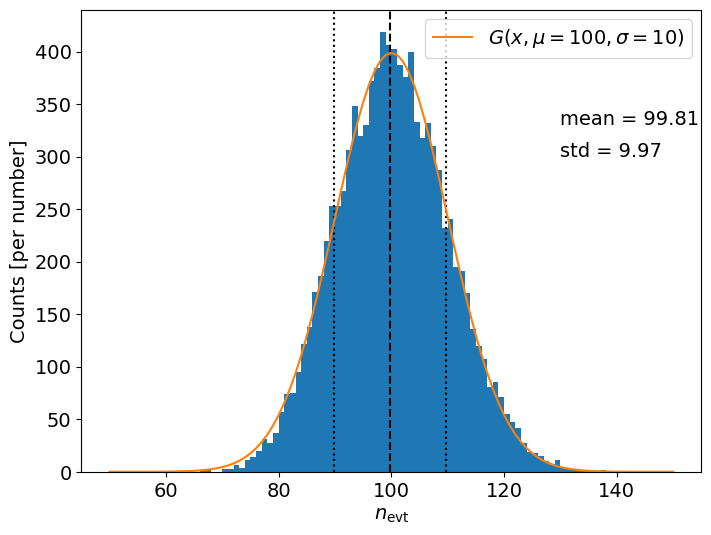

In [13]:
## Compute an array of possible values for the number of events
## that we would expect to see in each trial.
xvals = np.linspace(50,150,101)

## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

## Plot the histogram and some vertical lines for the mean and
## +-1 std. dev., as before.
ax.hist(nEvts, bins=xvals)
ax.axvline(x=np.mean(nEvts), ls='--', c='k')
ax.axvline(x=np.mean(nEvts)+np.std(nEvts), ls=':', c='k')
ax.axvline(x=np.mean(nEvts)-np.std(nEvts), ls=':', c='k')

## With an appropriate prefactor, compute the Gaussian
## that we would expect to match our histogram
myGauss = 10000*stats.norm(loc=100, scale=10).pdf(xvals)
plt.xlabel(r'$n_{\rm evt}$')
plt.ylabel(r'Counts [per number]')
plt.plot(xvals, myGauss, label=r'$G(x, \mu=100, \sigma=10)$')
plt.legend()

plt.annotate(f"mean = {np.mean(nEvts):0.2f}", (130, 330))
plt.annotate(f"std = {np.std(nEvts):0.2f}", (130, 300))
plt.show()

Note: The Gaussian is defined so that it integrates to 1.  But:
* We generated 10000 numbers
* Our histogram bins are now 1 unit wide, which changes the Riemann summation

So, to get the height of the curve to match the histogram we need to multiply by a prefactor of 10000

### Questions for discussion

#### 2.2 How do you think the distribution would look if we set a lower average number of events per trial (let's say 3)? Feel free to test it out.

# P-values and statistical significance

### You want to pay very close attention here.

One type of question that arises all the time in scientific data analysis is something along the lines of: "Are we seeing a random fluctuation, or is this a real signal?"  One of the ways in which we answer that question is by rephrasing it as: "How likely (or unlikely) is it that truly random data could have fluctuated in such a way as to give us a result at least this suprising?"   

That is the concept of a p-value.  In words it is the probabilitly, given random data with no signal, to see an outlier at least as big as what we observed.

If we believe that our data are distributed as a Gaussian, then mathematically, the probability of seeing an outlier equal to or larger than $x_0$ is

$p(x_0) = 1 - \int_{-\infty}^{x_0} G(x | \mu, \sigma) dx$

The scipy.stats package calls this quantity 'sf' for 'survival fraction'.

Let's have a look at it, for a "Unit Gaussian". First let's generate some values


In [14]:
## Generate an array of values to plot/check
x_vals = np.linspace(-6, 6, 601)

## Compute the values of the Gaussian function with a mean of 0
## and a standard deviation of 1, using the values of x from
## the above array
y_vals = gaussian(x_vals, mu=0, sigma=1)

## Compute the values of the survival fraction for each of the
## values of x from the above array
y_sf = stats.norm(loc=0, scale=1).sf(x_vals)

Now let's plot all these things!

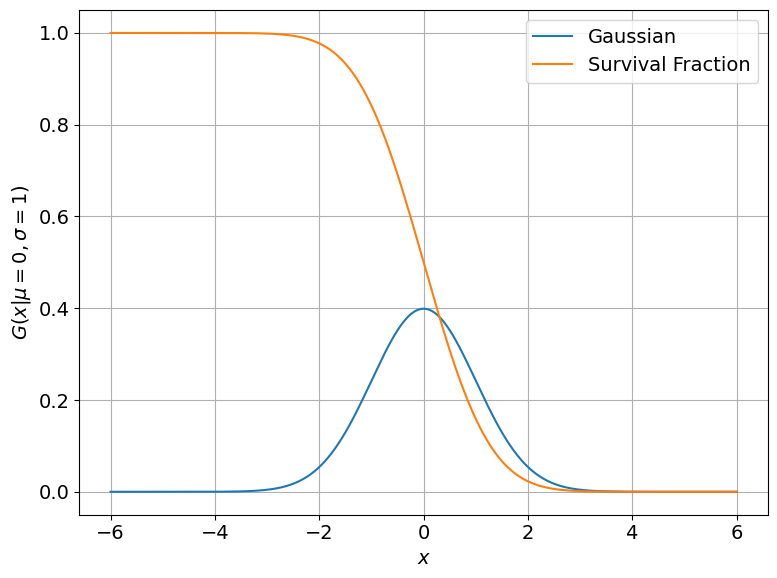

In [15]:
## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x_vals, y_vals, label="Gaussian")
ax.plot(x_vals, y_sf, label="Survival Fraction")
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$G(x | \mu=0, \sigma=1)$')
ax.grid()

fig.tight_layout()

plt.show()

The survival fraction (a.k.a. the p-value) goes to zero pretty quickly once you get out past about 1-2 times the standard deviation.  That is just saying that there isn't really a lot of stuff out in the tails of the Gaussian distribution.

Let's switch to plotting the y-axis on a log scale to see what is going on out there.

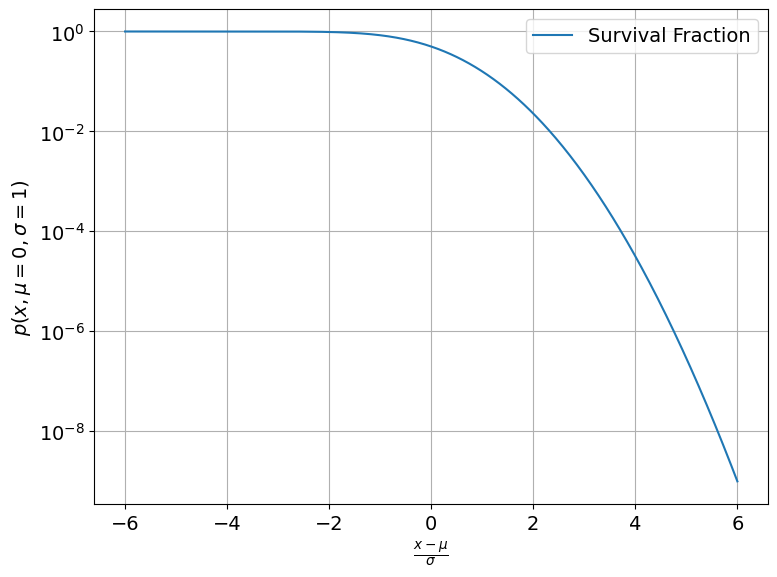

In [16]:
## Instantiate a figure and axis object for more control
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

#plt.plot(x_vals, y_vals, label="Gaussian")
ax.plot(x_vals, y_sf, label="Survival Fraction")

ax.set_xlabel(r'$\frac{x - \mu}{\sigma}$')
ax.set_ylabel(r'$p(x, \mu=0, \sigma=1)$')

ax.set_yscale("log")
ax.legend()

ax.grid()

fig.tight_layout()
plt.show()

That plot show us that values around less than about $2 \sigma$ (note the use of the jargon in defining value in terms of $\sigma$) are pretty common, but once we get past $2 \sigma$, the odds of seeing a value out there if the data are truly random get to be very small very quickly.  The odds of seeing a fluctuation at the $6 \sigma$ level at about 1 in 10 to the 9th, i.e., 1 in a billion.

### Questions for discussion

#### 3.1 Different fields have different conventions for what constitutes a "statistically significant" result.  In many fields a p-value of $< 0.05$ is considered significant.  In other fields, the threshold is $5 \sigma$.  How much more unlikely is a $5 \sigma$ fluctuation than one with a p-value of 0.05?   Why do you think that different fields might use such different conventions?  (It is ok to guess...)

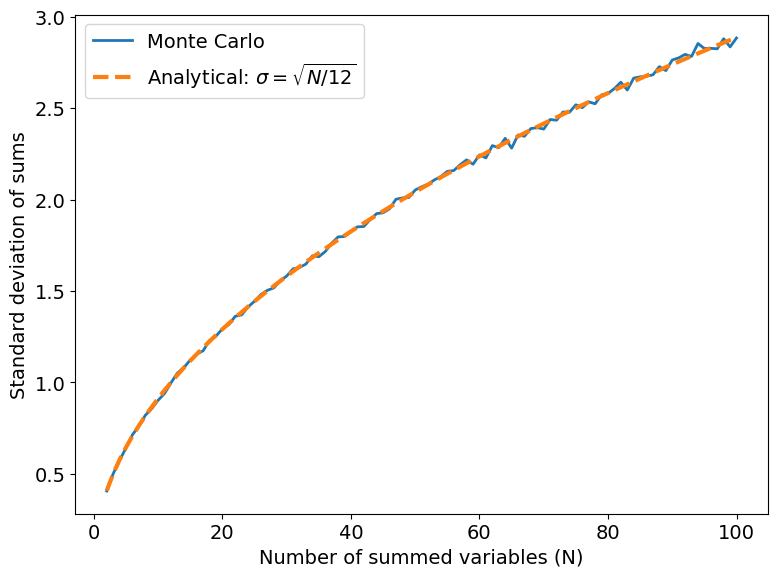

In [27]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

N_vals = np.arange(2, 101)

n_trials = 10000

mc_stds = []

for N in N_vals:
    samples = rng.uniform(size=(n_trials, N))  # uniform(0,1)
    sums = np.sum(samples, axis=1)
    mc_stds.append(np.std(sums))

mc_stds = np.array(mc_stds)

analytical_sigma = np.sqrt(N_vals / 12)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(N_vals, mc_stds, lw=2, label="Monte Carlo")
plt.plot(N_vals, analytical_sigma, ls='--', lw=3,
         label=r"Analytical: $\sigma=\sqrt{N/12}$")
plt.xlabel("Number of summed variables (N)")
plt.ylabel("Standard deviation of sums")
plt.legend()
plt.tight_layout()
plt.show()